In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation
from matplotlib import colors, colorbar


In [2]:
true_lmask = np.genfromtxt('/nethome/manra003/KempsRidley_turtle_strandings/data/true_landMask_296x_374y', delimiter=None)
U_ds = xr.open_dataset('/storage/shared/oceanparcels/input_data/CMEMS/NWSHELF_MULTIYEAR_PHY_004_009/metoffice_foam1_amm7_NWS_CUR_dm20141211.nc')


In [3]:
home_folder = '/nethome/manra003/analysis/KempRidley/'

threshold_t10 = 10
threshold_t12 = 12
threshold_t14 = 14  # degree Celcius

n_particles = 100
days = 120
wind = '3pWind'

figure_dpi = 100

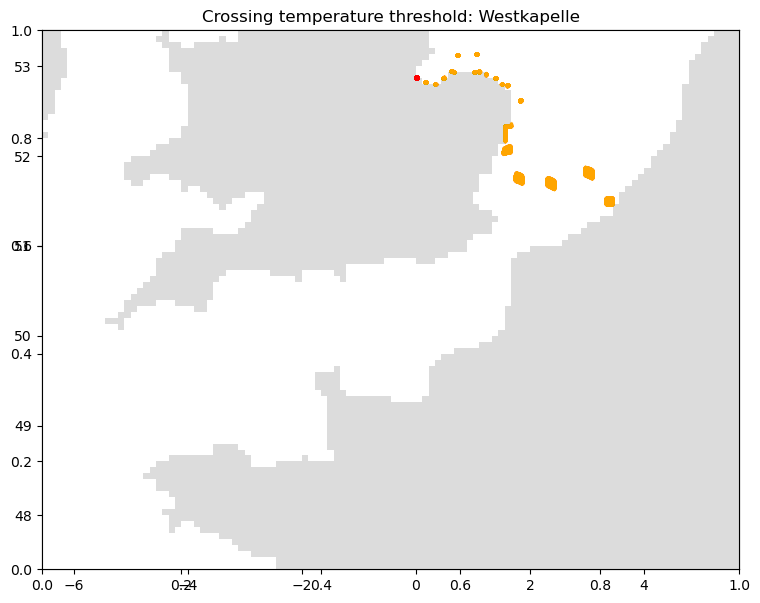

In [4]:
s="Westkapelle"

if wind == '0pWind':
    data_ds = xr.open_zarr(home_folder + 'simulations/{0}/Sum_BK_{0}_curr+stokes_120days_{1}.zarr'.format(wind, s))
else:
    data_ds = xr.open_zarr(home_folder + 'simulations/{0}/Sum_BK_{0}_curr+stokes+wind_120days_{1}.zarr'.format(wind, s))


lons = U_ds.longitude
lats = U_ds.latitude
fieldMesh_x, fieldMesh_y = np.meshgrid(lons, lats)

figure2 = plt.figure(figsize=(9, 7), dpi=figure_dpi)
plt.title('Crossing temperature threshold: {0}'.format(s))
colormap = colors.ListedColormap(['white', 'gainsboro'])
ax2 = plt.axes()
# ax2.pcolormesh(landMask)
ax2.pcolormesh(fieldMesh_x[110:201, 120:231], fieldMesh_y[110:201, 120:231], true_lmask[110:200, 120:230],
                cmap=colormap)
# plt.scatter(fieldMesh_x, fieldMesh_y, s=0.2, c='black')

ax2.scatter(data_ds.lon.values, data_ds.lat.values, c='orange', s=2, alpha=0.5)

beached = data_ds.where(data_ds.beached == -2)
ax2.scatter(beached.lon[:,-1].values, beached.lat[:,-1].values, c='red', s=4, alpha=0.5)

# reordering the labels
plt.show()


In [5]:
np.count_nonzero(~np.isnan(beached.lon[:,-1].values))

10000

In [6]:
winds=['0pWind', '01pWind', '1pWind', '2pWind', '3pWind']
stations =['IJmuiden', 'Westenschouwen',  'Monster', 'Den-Helder', 'Westkapelle']

stuck=np.zeros((len(stations),len(winds)))
for w_i,wind in enumerate(winds):
    print(wind)
    for s_i,s in enumerate(stations):
        if wind == '0pWind':
            data_ds = xr.open_zarr(home_folder + 'simulations/{0}/Sum_BK_{0}_curr+stokes_120days_{1}.zarr'.format(wind, s))
        else:
            data_ds = xr.open_zarr(home_folder + 'simulations/{0}/Sum_BK_{0}_curr+stokes+wind_120days_{1}.zarr'.format(wind, s))
        beached = data_ds.where(data_ds.beached == -2)
        out=np.count_nonzero(~np.isnan(beached.lon[:,-1].values))
        stuck[s_i,w_i]=out




0pWind
01pWind
1pWind
2pWind
3pWind


/nethome/manra003/.conda/envs/kemp/lib/python3.9/site-packages/xarray/coding/times.py:251: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


In [7]:
np.set_printoptions(suppress=True)
stuck

array([[    0.,     0.,  1251.,     6.,  3762.],
       [    8.,     0.,   579.,  5531.,    36.],
       [    1.,   247., 10000., 10000., 10000.],
       [    2.,   351.,  1813.,    14.,     0.],
       [ 1860.,   429., 10000., 10000., 10000.]])

In [8]:
np.sum(stuck,axis=0)

array([ 1871.,  1027., 23643., 25551., 23798.])

In [10]:
np.sum(stuck,axis=0)/50000*100

array([ 3.742,  2.054, 47.286, 51.102, 47.596])